In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
paht_clean = './food_data_cleaned.csv'

In [6]:
df_clean = pd.read_csv(paht_clean)

In [7]:
df_clean

,address,name,online_order,book_table,rating,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299,"Unit 04-01, 4th floor, Ascendas Park Square Ma...",Chung Wah,No,No,2.5,73,+91 9535948061,"ITPL Main Road, Whitefield",Casual Dining,Manchow Soup,"Chinese, Momos",800,Dine-out
9300,"107/PA, ITPL Main Road, Whitefield, Bangalore",Nawabs Empire,No,No,3.2,5,+91 8123358857,"ITPL Main Road, Whitefield",Quick Bites,NaN,"North Indian, Chinese, Arabian, Momos",300,Dine-out
9301,"Cessna Business Park, Sarjapur Marathahalli O...",Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,411,+91 9663517066\n+91 9686861135,Bellandur,Casual Dining,"Chicken Quesadilla, Naan, Breakfast Buffet, Ch...","North Indian, Continental, Asian",1800,Dine-out
9302,"44, Kodigehalli to Hoodi Main Road, Mahadevapu...",SeeYa Restaurant,No,No,3.3,4,+91 9164562939,KR Puram,Quick Bites,NaN,"North Indian, Kerala, Chinese",350,Dine-out


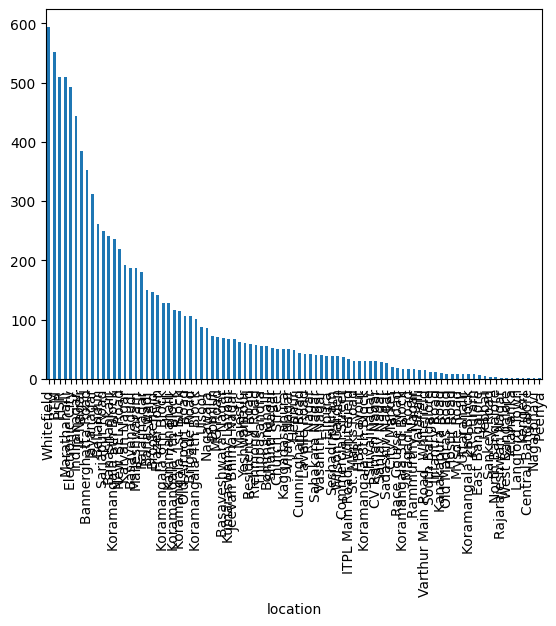

In [9]:
df_clean['location'].value_counts().plot(kind='bar')
plt.show()

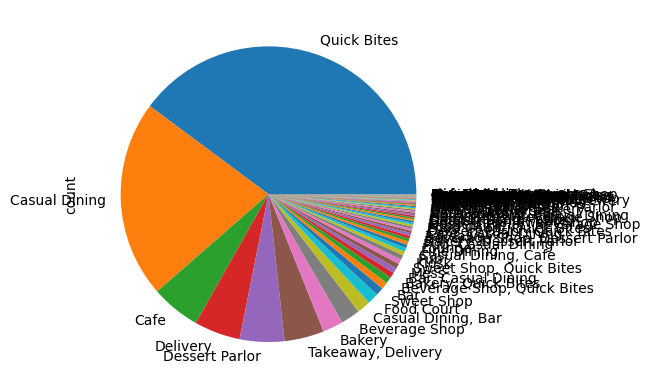

In [10]:

df_clean['rest_type'].value_counts().plot(kind='pie')
plt.show()

In [12]:
import seaborn as sns
data = df_clean[['rating', 'votes']]
data = data.dropna()

X = data['votes'].values.reshape(-1, 1)
y = data['rating'].values.reshape(-1, 1)

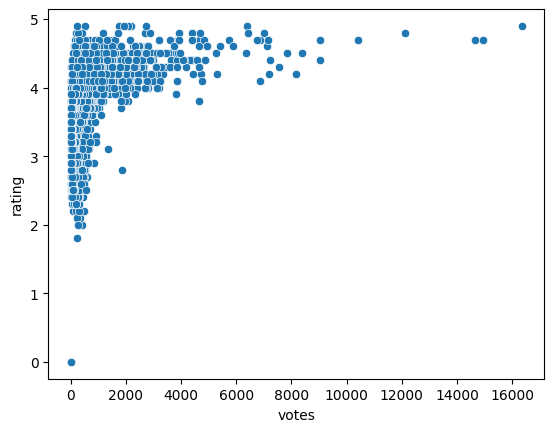

In [13]:

sns.scatterplot(x='votes', y='rating', data=df_clean)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.06689199285228731


In [16]:

# Lấy giá trị trong cột 'dish_liked', loại bỏ các giá trị thiếu
dish_liked = df_clean['dish_liked'].dropna()

# Tính toán tần suất của các món ăn
freq = {}
for dishes in dish_liked:
    for dish in dishes.split(', '):
        freq[dish] = freq.get(dish, 0) + 1

# Sắp xếp theo thứ tự giảm dần và hiển thị kết quả
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_freq[:10])

[('Pasta', 464), ('Burgers', 446), ('Biryani', 399), ('Pizza', 378), ('Coffee', 322), ('Paratha', 322), ('Cocktails', 313), ('Sandwiches', 272), ('Chicken Biryani', 264), ('Mocktails', 238)]
